In [1]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

### Single-level DWT

In [2]:
cA, cD = pywt.dwt( [ 1, 2, 3, 4], "db1")

cA, cD

(array([2.12132034, 4.94974747]), array([-0.70710678, -0.70710678]))

### Single-level IDWT

In [3]:
signal = np.array( [ 1, 2, 3, 4])

wavelet = "db1";

print( f"Signal: { signal}")

coeffs = pywt.dwt( signal, wavelet=wavelet)

cA, cD = coeffs

print( f"Approximation: { cA}")
print( f"Detail: { cD}")

rec_signal = pywt.idwt( cA, cD, wavelet=wavelet)

print( f"Reconstructed Signal: { rec_signal}")

Signal: [1 2 3 4]
Approximation: [2.12132034 4.94974747]
Detail: [-0.70710678 -0.70710678]
Reconstructed Signal: [1. 2. 3. 4.]


### Multi-level DWT

In [4]:
pywt.wavedec( [ 1, 2, 3, 4], "db1", level=2)

[array([5.]), array([-2.]), array([-0.70710678, -0.70710678])]

### Multi-level IDWT

In [5]:
signal = [ 1, 2, 3, 4, 5, 6, 7, 8]

print( f"Signal: { signal}")

wavelet="db1"

coeffs = pywt.wavedec( signal, wavelet=wavelet, level=3)

cA3, cD3, cD2, cD1 = coeffs
print( f"Approximation Level 3: { cA3}")
print( f"Detail Level 3: { cD3}")
print( f"Detail Level 2: { cD2}")
print( f"Detail Level 1: { cD1}")

rec_signal = pywt.waverec( [ cA3, cD3, cD2, cD1], wavelet=wavelet)

print( f"Reconstructed Signal: { rec_signal}")

Signal: [1, 2, 3, 4, 5, 6, 7, 8]
Approximation Level 3: [12.72792206]
Detail Level 3: [-5.65685425]
Detail Level 2: [-2. -2.]
Detail Level 1: [-0.70710678 -0.70710678 -0.70710678 -0.70710678]
Reconstructed Signal: [1. 2. 3. 4. 5. 6. 7. 8.]


In [6]:
signal = [ 1, 2, 3, 4, 5, 6, 7, 8]

print( f"Signal: { signal}")

wavelet="db1"

cA1, cD1 = pywt.dwt( signal, wavelet=wavelet)

print( "Level 1:")
print( f"Detail: { cD1}")
print( f"Approximation: { cA1}")

cA2, cD2 = pywt.dwt( cA1, wavelet=wavelet)

print( "Level 2:")
print( f"Detail: { cD2}")
print( f"Approximation: { cA2}")

cA3, cD3 = pywt.dwt( cA2, wavelet=wavelet)

print( "Level 3:")
print( f"Detail: { cD3}")
print( f"Approximation: { cA3}")

Signal: [1, 2, 3, 4, 5, 6, 7, 8]
Level 1:
Detail: [-0.70710678 -0.70710678 -0.70710678 -0.70710678]
Approximation: [ 2.12132034  4.94974747  7.77817459 10.60660172]
Level 2:
Detail: [-2. -2.]
Approximation: [ 5. 13.]
Level 3:
Detail: [-5.65685425]
Approximation: [12.72792206]


### CWT

In [7]:
coeff, freq = pywt.cwt( data=[ 1, 2, 3, 4],
		  scales=np.arange( 1, 10, 1),
		  wavelet="morl")

coeff, freq

(array([[ 0.12593504,  0.01182177, -0.02259743, -0.61833643],
        [-0.09947654,  0.45993477, -0.87064999,  0.78026756],
        [-0.0611729 , -0.83188766, -0.10585816,  1.47781123],
        [-1.47676641, -0.7892306 ,  1.24867472,  1.99924781],
        [-1.72708547,  0.05983985,  1.99700753,  2.40506692],
        [-1.27972299,  0.73914959,  2.4214839 ,  2.63915731],
        [-0.63372458,  1.29963537,  2.58824377,  2.6793111 ],
        [ 0.01329859,  1.61060798,  2.66492535,  2.72154463],
        [ 0.53199105,  1.84258653,  2.64986731,  2.68196876]]),
 array([0.8125    , 0.40625   , 0.27083333, 0.203125  , 0.1625    ,
        0.13541667, 0.11607143, 0.1015625 , 0.09027778]))

### Wavelet objects

In [8]:
def print_wave( name):
	w = pywt.Wavelet( name)
	print( w)

	print( f"Deconstruction - Low Pass: { w.dec_lo}")
	print( f"Deconstruction - High Pass: { w.dec_hi}")
	print( f"Reconstruction - Low Pass: { w.rec_lo}")
	print( f"Reconstruction - High Pass: { w.rec_hi}")

	print( f"Vanishing Moments PSI: { w.vanishing_moments_psi}")
	print( f"Vanishing Moments PHI: { w.vanishing_moments_phi}")

print_wave( "db2")

Wavelet db2
  Family name:    Daubechies
  Short name:     db
  Filters length: 4
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
Deconstruction - Low Pass: [-0.12940952255126037, 0.2241438680420134, 0.8365163037378079, 0.48296291314453416]
Deconstruction - High Pass: [-0.48296291314453416, 0.8365163037378079, -0.2241438680420134, -0.12940952255126037]
Reconstruction - Low Pass: [0.48296291314453416, 0.8365163037378079, 0.2241438680420134, -0.12940952255126037]
Reconstruction - High Pass: [-0.12940952255126037, -0.2241438680420134, 0.8365163037378079, -0.48296291314453416]
Vanishing Moments PSI: 2
Vanishing Moments PHI: 0


Wavelet db3
  Family name:    Daubechies
  Short name:     db
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


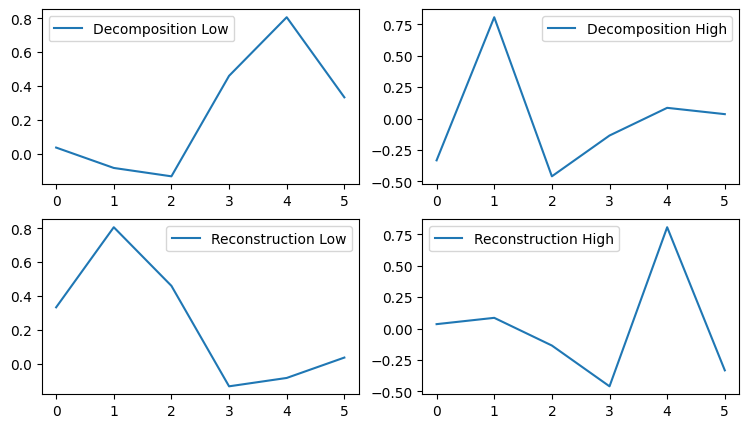

In [9]:
w = pywt.Wavelet( "db3")

print( w)

plt.figure( figsize=( 9, 5))

plt.subplot( 2, 2, 1).plot( w.dec_lo, label="Decomposition Low")
plt.legend()
plt.subplot( 2, 2, 2).plot( w.dec_hi, label="Decomposition High")
plt.legend()
plt.subplot( 2, 2, 3).plot( w.rec_lo, label="Reconstruction Low")
plt.legend()
plt.subplot( 2, 2, 4).plot( w.rec_hi, label="Reconstruction High")
plt.legend()

plt.show()

### Wavelet from scratch

In [10]:
def convolve_1d( signal, kernel, stride=1):
    N = len( signal)
    K = len( kernel)
    
    # Reverse the kernel
    kernel = kernel[::-1]
    
    # Compute the range and step based on the stride
    output_length = ( N - K) // stride + 1
    result = []
    
    for i in range( 0, output_length * stride, stride):
        # Define the segment of the signal and kernel to dot product
        segment = signal[ i: i + K]
        dot_product = np.dot( segment, kernel[ :len( segment)])
        result.append( dot_product)
    
    return result

In [11]:
def dwt( signal, low_decon_filter, high_docon_filter):
	approx_coef = convolve_1d( signal, low_decon_filter, len( low_decon_filter))
	detail_coef = convolve_1d( signal, high_docon_filter, len( high_docon_filter))

	return approx_coef, detail_coef

In [12]:
w = pywt.Wavelet( "db1")

mcA, mcD = dwt(
	signal=[ 1, 2, 3, 4],
	low_decon_filter=w.dec_lo,
	high_docon_filter=w.dec_hi)

print( f"Approx: { mcA}")
print( f"Detail: { mcD}")

np.allclose( cA, mcA) and np.allclose( cD, mcD)

Approx: [2.121320343559643, 4.949747468305834]
Detail: [-0.7071067811865476, -0.7071067811865475]


True

In [13]:
def upsamplex2( coefficients):
	upsampled = np.zeros( len( coefficients) * 2)
	upsampled[ ::2] = coefficients
	return upsampled

In [14]:
def convolve_and_sum( upsampled_approx, upsampled_detail, low_recon_filter, high_recon_filter):
	approx_convolved = np.convolve( upsampled_approx, low_recon_filter, mode="same")
	detail_convolved = np.convolve( upsampled_detail, high_recon_filter, mode="same")

	return approx_convolved + detail_convolved

In [15]:
def idwt( approx_ceof, detail_coef, low_recon_filter, high_recon_filter):

	upsampled_approx = upsamplex2( approx_ceof)
	upsampled_detail = upsamplex2( detail_coef)

	reconstructed_signal = convolve_and_sum( upsampled_approx, upsampled_detail, low_recon_filter, high_recon_filter)

	return reconstructed_signal

In [16]:
reconstructed_signal = idwt( approx_ceof=mcA, 
	  detail_coef=mcD,
	  low_recon_filter=w.rec_lo,
	  high_recon_filter=w.rec_hi)

print( f"Reconstructed Signal: { reconstructed_signal}")

Reconstructed Signal: [1. 2. 3. 4.]


### Multi-level wavelet transform test

In [17]:
signal = [ 1, 2, 3, 4, 5, 6, 7, 8]

mcA1, mcD1 = dwt( signal=signal,
			    low_decon_filter=w.dec_lo,
				high_docon_filter=w.dec_hi)

print( "Level 1:")
print( f"Detail: { mcD1}")
print( f"Approximation: { mcA1}")
print( np.allclose( cA1, mcA1) and np.allclose( cD1, mcD1))

mcA2, mcD2 = dwt( signal=cA1,
			    low_decon_filter=w.dec_lo,
				high_docon_filter=w.dec_hi)

print( "Level 2:")
print( f"Detail: { mcD2}")
print( f"Approximation: { mcA2}")
print( np.allclose( cA2, mcA2) and np.allclose( cD2, mcD2))

mcA3, mcD3 = dwt( signal=cA2,
			    low_decon_filter=w.dec_lo,
				high_docon_filter=w.dec_hi)

print( "Level 3:")
print( f"Detail: { mcD3}")
print( f"Approximation: { mcA3}")
print( np.allclose( cA3, mcA3) and np.allclose( cD3, mcD3))

Level 1:
Detail: [-0.7071067811865476, -0.7071067811865475, -0.7071067811865479, -0.7071067811865479]
Approximation: [2.121320343559643, 4.949747468305834, 7.778174593052023, 10.606601717798213]
True
Level 2:
Detail: [-2.000000000000001, -2.0]
Approximation: [5.000000000000001, 13.000000000000002]
True
Level 3:
Detail: [-5.656854249492381]
Approximation: [12.727922061357859]
True


### Multi-level reconstruction test

In [18]:
rmcA2 = idwt( approx_ceof=mcA3,
			  detail_coef=mcD3,
			  low_recon_filter=w.rec_lo,
			  high_recon_filter=w.rec_hi)

print( f"Reconstructed Approximation Level 2: { rmcA2}")
print( np.allclose( mcA2, rmcA2))

rmcA1 = idwt( approx_ceof=rmcA2,
			  detail_coef=mcD2,
			  low_recon_filter=w.rec_lo,
			  high_recon_filter=w.rec_hi)

print( f"Reconstructed Approximation Level 1: { rmcA1}")
print( np.allclose( mcA1, rmcA1))

recon_signal = idwt( approx_ceof=rmcA1,
			 		 detail_coef=mcD1,
			 		 low_recon_filter=w.rec_lo,
			 		 high_recon_filter=w.rec_hi)

print( f"Reconstructed Signal: { recon_signal}")
print( np.allclose( signal, recon_signal))

Reconstructed Approximation Level 2: [ 5. 13.]
True
Reconstructed Approximation Level 1: [ 2.12132034  4.94974747  7.77817459 10.60660172]
True
Reconstructed Signal: [1. 2. 3. 4. 5. 6. 7. 8.]
True


### Wavelet Families

In [19]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [20]:
c = 0
for p in pywt.wavelist( kind="discrete"):
	print( p, end=" ")
	c += 1
	if c % 10 == 0: print()

bior1.1 bior1.3 bior1.5 bior2.2 bior2.4 bior2.6 bior2.8 bior3.1 bior3.3 bior3.5 
bior3.7 bior3.9 bior4.4 bior5.5 bior6.8 coif1 coif2 coif3 coif4 coif5 
coif6 coif7 coif8 coif9 coif10 coif11 coif12 coif13 coif14 coif15 
coif16 coif17 db1 db2 db3 db4 db5 db6 db7 db8 
db9 db10 db11 db12 db13 db14 db15 db16 db17 db18 
db19 db20 db21 db22 db23 db24 db25 db26 db27 db28 
db29 db30 db31 db32 db33 db34 db35 db36 db37 db38 
dmey haar rbio1.1 rbio1.3 rbio1.5 rbio2.2 rbio2.4 rbio2.6 rbio2.8 rbio3.1 
rbio3.3 rbio3.5 rbio3.7 rbio3.9 rbio4.4 rbio5.5 rbio6.8 sym2 sym3 sym4 
sym5 sym6 sym7 sym8 sym9 sym10 sym11 sym12 sym13 sym14 
sym15 sym16 sym17 sym18 sym19 sym20 

In [21]:
print_wave( "db2")

Wavelet db2
  Family name:    Daubechies
  Short name:     db
  Filters length: 4
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
Deconstruction - Low Pass: [-0.12940952255126037, 0.2241438680420134, 0.8365163037378079, 0.48296291314453416]
Deconstruction - High Pass: [-0.48296291314453416, 0.8365163037378079, -0.2241438680420134, -0.12940952255126037]
Reconstruction - Low Pass: [0.48296291314453416, 0.8365163037378079, 0.2241438680420134, -0.12940952255126037]
Reconstruction - High Pass: [-0.12940952255126037, -0.2241438680420134, 0.8365163037378079, -0.48296291314453416]
Vanishing Moments PSI: 2
Vanishing Moments PHI: 0


### Create my Custom Wavelet

In [22]:
dec_lo, dec_hi, rec_lo, rec_hi = [ 1, 1], [ -1, 1], [ 1, 1], [ 1, -1]

filter_bank = [ dec_lo, dec_hi, rec_lo, rec_hi]

myWavelet = pywt.Wavelet( name="my wavelet", filter_bank=filter_bank)

cA, cD = pywt.dwt( [ 1, 2, 3, 4], wavelet=myWavelet)

pywt.idwt( cA, cD, wavelet=myWavelet)

array([2., 4., 6., 8.])

### Creating Filter Bank Based on Low Pass Analysis Filter

In [23]:
def create_high_pass( low_pass_filter):
	reversed_low_pass_filter = low_pass_filter[::-1]

	high_pass_filter = np.array( [ ( -1) ** ( i + 1) * coef for i, coef in enumerate( reversed_low_pass_filter)])
    
	return high_pass_filter

def create_low_pass_reconstruction( low_pass_filter):
	high_pass_deconstruction_filter = create_high_pass( low_pass_filter)

	low_pass_reconstruction = np.array( [ ( -1) ** ( i + 1) * coef for i, coef in enumerate( high_pass_deconstruction_filter)])

	return low_pass_reconstruction

def create_high_pass_reconstruction( low_pass_filter):
	high_pass_reconstruction = np.array( [ ( -1) ** ( i) * coef for i, coef in enumerate( low_pass_filter)])

	return high_pass_reconstruction

def create_filter_bank_from_low_pass_analysis( low_pass_analysis):
	high_pass_analysis = create_high_pass( low_pass_analysis)
	low_pass_reconstruction = create_low_pass_reconstruction( low_pass_analysis)
	high_pass_reconstruction = create_high_pass_reconstruction( low_pass_analysis)

	return np.array( low_pass_analysis), high_pass_analysis, low_pass_reconstruction, high_pass_reconstruction

In [24]:
print( "\t\tDec_Lo?\t\tDec_Lo?\t\tRec_Lo?\t\tRec_Hi?")
for wavelet in pywt.wavelist( kind="discrete"):
	print( wavelet, end="\t\t")
	
	w = pywt.Wavelet( wavelet)

	m_dec_lo, m_dec_hi, m_rec_lo, m_rec_hi = create_filter_bank_from_low_pass_analysis( w.dec_lo)

	print( np.allclose( m_dec_lo, w.dec_lo), end="\t\t")
	print( np.allclose( m_dec_hi, w.dec_hi), end="\t\t")
	print( np.allclose( m_rec_lo, w.rec_lo), end="\t\t")
	print( np.allclose( m_rec_hi, w.rec_hi))

		Dec_Lo?		Dec_Lo?		Rec_Lo?		Rec_Hi?
bior1.1		True		True		True		True
bior1.3		True		False		False		True
bior1.5		True		False		False		True
bior2.2		True		False		False		True
bior2.4		True		False		False		True
bior2.6		True		False		False		True
bior2.8		True		False		False		True
bior3.1		True		False		False		True
bior3.3		True		False		False		True
bior3.5		True		False		False		True
bior3.7		True		False		False		True
bior3.9		True		False		False		True
bior4.4		True		False		False		True
bior5.5		True		False		False		True
bior6.8		True		False		False		True
coif1		True		True		True		True
coif2		True		True		True		True
coif3		True		True		True		True
coif4		True		True		True		True
coif5		True		True		True		True
coif6		True		True		True		True
coif7		True		True		True		True
coif8		True		True		True		True
coif9		True		True		True		True
coif10		True		True		True		True
coif11		True		True		True		True
coif12		True		True		True		True
coif13		True		True		True		True
coif14		True		True		True		True
coif15		True		True		True		True